<body>
    <section style="border:1px solid RoyalBlue;">
        <section style="background-color:White; font-family:Georgia;text-align:center">
            <h1 style="color:RoyalBlue">Introduction to Data Science</h1>
            <h2 style="color:RoyalBlue">Dr.	Casey Kennington</h1>
            <h2 style="font-family:Courier; text-align:center;">CS-533</h2>
            <br>
            <h2 style="font-family:Garamond;">Gerardo Caracas Uribe</h2>
            <h2 style="font-family:Garamond;">Student ID: 114104708</h2>
            <h2 style="font-family:Courier;">Assignment: A1-Probability & Information Theory</h2>
            <hr/>
        </section>
    </section>
</body>

# Assignment 2 - Elementary Probability and Information Theory 
# Boise State University DL - Dr. Kennington

### Instructions and Hints:

* This notebook loads some data into a `pandas` dataframe, then does a small amount of preprocessing. Make sure your data can load by stepping through all of the cells up until question 1. 
* Most of the questions require you to write some code. In many cases, you will write some kind of probability function like we did in class using the data. 
* Some of the questions only require you to write answers, so be sure to change the cell type to markdown or raw text
* Don't worry about normalizing the text this time (e.g., lowercase, etc.). Just focus on probabilies. 
* Most questions can be answered in a single cell, but you can make as many additional cells as you need. 
* When complete, please export as HTML. Follow the instructions on the corresponding assignment Trello card for submitting your assignment. 

In [1]:
import pandas as pd 
import numpy as np

data = pd.read_csv('pnp-train.txt',delimiter='\t',encoding='latin-1', # utf8 encoding didn't work for this
                  names=['type','name']) # supply the column names for the dataframe

# this next line creates a new column with the lower-cased first word
data['first_word'] = data['name'].map(lambda x: x.lower().split()[0])

In [2]:
data[:10]

,type,name,first_word
0,drug,Dilotab,dilotab
1,movie,Beastie Boys: Live in Glasgow,beastie
2,person,Michelle Ford-Eriksson,michelle
3,place,Ramsbury,ramsbury
4,place,Market Bosworth,market
5,drug,Cyanide Antidote Package,cyanide
6,person,Bill Johnson,bill
7,place,Ettalong,ettalong
8,movie,The Suicide Club,the
9,place,Pézenas,pézenas


In [3]:
data.describe()

,type,name,first_word
count,21001,21001,21001
unique,5,20992,13703
top,movie,Aberdeen,the
freq,6262,2,635


## 1. Write a probability function/distribution $P(T)$ over the types. 

Hints:

* The Counter library might be useful: `from collections import Counter`
* Write a function `def P(T='')` that returns the probability of the specific value for T
* You can access the types from the dataframe by calling `data['type']`

In [4]:
from collections import Counter

In [5]:
counts = Counter(data['type'])

In [6]:
def P(T=''):
    global counts # the global keyword tells this function to use the global variable called counts
    global data  
    return float(counts[T]) / float(len(data))


## 2. What is `P(T='movie')` ?

In [7]:
P(T='movie')

0.29817627732012764

## 3. Show that your probability distribution sums to one.

For this, let's validate the function<br> Let's apply this<br>
\begin{equation*}
\left(\sum_{i=1}^{len(types)}\frac{len(type_i)}{len(types)}  \right) = 1
\end{equation*}


In [8]:
sumProbabilities = P("movie")+P("drug")+P("person")+P("place")+P("company")
sumProbabilities

1.0

## 4. Write a joint distribution using the type and the first word of the name

Hints:

* The function is $P2(T,W_1)$
* You will need to count up types AND the first words, for example: ('person','bill)
* Using the zip function was useful for me here

In [9]:
def P2(T='',W1=''):
    global data
    total = len(data)
    prob = len((data[(data.type == T) & (data.first_word == W1)]))/total
    return prob


## 5. What is P2(T='person', W1='bill')? What about P2(T='movie',W1='the')?

In [10]:
P2(T='person',W1='bill')

0.00047616780153326033

In [11]:
P2(T='movie', W1='the')

0.02747488214846912

## 6. Show that your probability distribution P(T,W1) sums to one.

This is going to be expensive, but we will use all the permutations possible, not just some. For this we need two lists, one with types and the other one with first word

In [12]:
countsFW = Counter(data['first_word'])
ttypes = []
tfw = []
for a in counts.keys():
    ttypes.append(a)
for a in countsFW.keys():
    tfw.append(a)
ttypes = list(ttypes)

Now lets iterate through all the possible combinations, even if they are not included in the data set. <br> The result has to be 1

In [13]:
sumProbs = 0
for nm in tfw:
    for tp in ttypes:
        sumProbs = sumProbs + P2(T=tp, W1=nm)
print(sumProbs)

0.9999999999997348


## 7. Make a new function Q(T) from marginalizing over P(T,W1) and make sure that Q(T) sums to one.

Hints:

* Your Q function will call P(T,W1)
* Your check for the sum to one should be the same answer as Question 3, only it calls Q instead of P.

In [13]:
def Q(T=''):
    return sum(  [P2(T=T, W1=x) for x in set(tfw)])

In [14]:
for x in set(ttypes):
    print(Q(T=x))

0.2395124041712426
0.29817627732013385
0.1613732679396312
0.1826579686681631
0.11828008190086498


In [15]:
Q(T='movie')

0.29817627732013385

In [16]:
sum([Q(T=x) for  x in set(ttypes)])

1.0000000000000355

## 8. What is the KL Divergence of your Q function and your P function for Question 1?

* Even if you know the answer, you still need to write code that computes it.

In [17]:
import math

In [18]:
sum([  P(T=x)*math.log(P(T=x)/Q(T=x))  for x in set(ttypes)])

-3.5696945243669714e-14

## 9. Convert from P(T,W1) to P(W1|T) 

Hints:

* Just write a comment cell, no code this time. 
* Note that $P(T,W1) = P(W1,T)$

## $P(W_1|T) = \frac{P(W_1,T)}{P(T)}$

# Answer:<br>
### By using Baye's theorem<br>
### $$P(A|B) = \frac{P(A,B)}{P(B)} = \frac{P(B|A)P(A)}{P(B)} = \frac{P(B|A)P(A)}{\sum_i P(B|A_i)P(A_i)}  $$
### We can use the following equation (Let's call this eq. 1)
### $$P(A|B) = \frac{P(A,B)}{P(B)}  $$
### From question 4, we have
### $$  P(T,W_1) $$
### Now, considering that
### $$P(T,W_1) = P(W_1,T)$$
### We have now (Let's call this eq.2)
### $$ P(W_1,T) $$
### Now from question 1, we already have (Let's call this eq. 3)
### $$ P(T) $$
### The solution is now, based on eq. 1 and eq. 2
### $$ eq_1 = \frac{eq_2}{eq_3} $$
### Which we end up with:
### $$ P(W_1|T) = \frac{P(W_1,T)}{P(T)}$$

## 10. Write a function `Pwt` (that calls the functions you already have) to compute $P(W_1|T)$.

* This will be something like the multiplication rule, but you may need to change something

In [19]:
def Pwt(W1='',T=''):
    return P2(T=T,W1=W1)/P(T=T)

## 11. What is P(W1='the'|T='movie')?

In [20]:
Pwt(W1='the',T='movie')

0.09214308527626956

## 12. Use Baye's rule to convert from P(W1|T) to P(T|W1). Write a function Ptw to reflect this. 

Hints:

* Call your other functions.
* You may need to write a function for P(W1) and you may need a new counter for `data['first_word']`

In [21]:
def P_W(W1=''):
    global countsFW # the global keyword tells this function to use the global variable called counts
    global data  
    return float(countsFW[W1]) / float(len(data))


In [22]:
def Ptw(T='',W1=''):
    return P2(T=T,W1=W1)/P_W(W1=W1)


## 13 
### What is P(T='movie'|W1='the')? 
### What about P(T='person'|W1='the')?
### What about P(T='drug'|W1='the')?
### What about P(T='place'|W1='the')
### What about P(T='company'|W1='the')

In [23]:
Ptw(T='movie',W1='the')

0.9086614173228347

In [24]:
Ptw(T='person',W1='the')

0.0

In [25]:
Ptw(T='drug',W1='the')

0.0

In [26]:
Ptw(T='place',W1='the')

0.0015748031496062994

In [27]:
Ptw(T='company',W1='the')

0.08976377952755905

## 14 Given this, if the word 'the' is found in a name, what is the most likely type?

In [28]:
print("movie")

movie


## 15. Is Ptw(T='movie'|W1='the') the same as Pwt(W1='the'|T='movie') the same? Why or why not?

In [29]:
print(Ptw(T='movie',W1='the'))
print(Pwt(W1='the',T='movie'))

0.9086614173228347
0.09214308527626956


### This is a conditional probability, which means what given:
### $$ P(B|A) $$
### What this means is: the conditional probability of an event B is the probability that the even will occurr given the knowledge that an event A has already occurred. <br>
### Therefore it is very important the order of the input paramenter (That's why we can't just swap them) because we know that the second event, (in the case of the above equation B) has already happened.<br>
### The answers that Ptw and Pwt are giving, come from different questions, let's say this in term of functions.

### The following equation says "What is the probability of a first word "x" if the Type is "y" <- We already know "y"

### $$ P(W_1|T) $$

### The following equation says "What is the probability of a type "x" if the first word is "y" <- We already know "y"
### $$ P(T|W_1) $$


## 16. Do you think modeling Ptw(T|W1) would be better with a continuous function like a Gaussian? Why or why not?



I don't think so, my reasoning is that this is not a probability function that can be expressed as a continious function, because the data we have are categorical variables, between them there is no notion of who is behind or ahead of whom.
In the case of, let's say age, or height, we know what is something shorter than other, or taller, but in this case, the categorical variables are just a classificaion, not a measurement. Therefore we can't see this in terms of a funtion over time.<br>
In this case, using a discrete function is best in this case, because we already have all the cases of study, all the tabular data is there and we dont need to **calculate values in the midle**, which is one of the motivations of converting something discrete to continious. <br>
In conclussion, it's my opinion that leaving the probability functions as discrete is better

* Load the `rivers.csv` file and print out a histogram
* Which disitrbutions do you think would fit the data for the `x` column? Here is a list: https://en.wikipedia.org/wiki/Category:Continuous_distributions
* Hint: look at some of the exponential distributions, and maybe the Pareto, you can always use Gaussian
* Use the principle of Maximum Entropy to detemrine which of the two distributions would best fit your data (you can sum over all values in your data)
* You will need to estimate the parameters needed for each distribution (you may need to write maximum likelihood estimation functions for estimating your parameters)
* You can use built-in python functions to model the (pdf) distribution, if they exist. Otherwise, you may need to write your own
* Show the Maximum Entropy calculations. 
* Calculate the KL divergence on the two distributions (in both directions)
* make nice markdown commments so I know where everything is

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h1 style="font-family:Garamond; color:tomato">Excercise rivers.csv</h1>
        <h2 style="font-family:Garamond; color:solid #229954">Load the rivers.csv and printout a histogram</h2>
        
        <hr/>
    </section>
</body>

In [30]:
%matplotlib inline  

import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('rivers.csv') 

In [32]:
data.describe()

,Unnamed: 0,x
count,141.000000,141.000000
mean,71.000000,591.184397
std,40.847277,493.870842
min,1.000000,135.000000
25%,36.000000,310.000000
50%,71.000000,425.000000
75%,106.000000,680.000000
max,141.000000,3710.000000


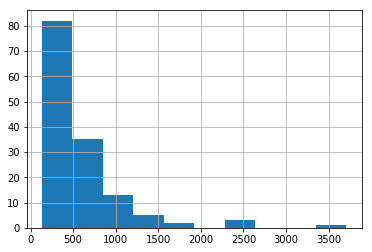

In [33]:
data.x.hist()

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h1 style="font-family:Garamond; color:tomato">Excercise rivers.csv</h1>
        <h2 style="font-family:Garamond; color:solid #229954">Which disitrbutions do you think would fit the data for the x column?</h2>
        
        <hr/>
    </section>
</body>

In [34]:
from scipy.stats import expon
from scipy.stats import norm
import numpy as np
import math

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond;">First Selection</h2>
        <h3 style="font-family:Garamond;">Exponential Function</h3>
        <hr/>
    </section>
</body>


<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond;">For parameter estimation we need to get lambda</h2>
        
    </section>
</body>

### $$ \hat{\lambda} = \frac{1}{\bar{x}}  $$ ###
<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond;"> Whereas </h2>
    </section>
</body>

### $$ \bar{x} = sample\,mean  $$ ###

In [35]:
desc=data.x.describe()
bar_x=desc["mean"]
exp_lambda = 1/bar_x

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h3 style="font-family:Garamond;">Now let's visualize our first selection</h3>
    </section>
</body>

In [44]:
def myExpFunc(lmda, x):
    return lmda*math.exp(-1*lmda*x)
x_vals=np.arange(0,3500,1)
x_vals.tolist()
y=[]
for x in x_vals:
    y.append(myExpFunc(exp_lambda,x))

D:\sw\anaconda\envs\fastai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


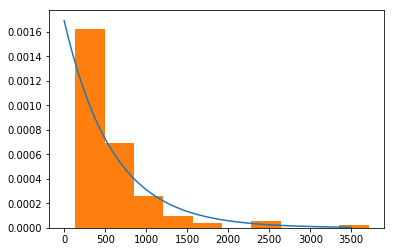

In [45]:
plt.plot(y)
plt.hist(data.x,normed=True)
plt.show()

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h2 style="font-family:Garamond;">Second Selection</h2>
        <h3 style="font-family:Garamond;">Gaussian Function</h3>
        <hr/>
    </section>
</body>

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h3 style="font-family:Garamond;">For our Gaussian function, we are going to use scipy package, thus we need to provide the mean and standard deviation</h3>
    </section>
</body>

In [46]:
def myOwnGausFunct(x, std, mean):
    x_tmp = ((x-mean)/std)
    #x_tmp2 = math.exp(-1*np.pi*math.sqr(x_tmp))
    x_tmp2 = math.exp(-1*np.pi*(x_tmp ** 2))
    return ((1/std)*x_tmp2)

D:\sw\anaconda\envs\fastai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


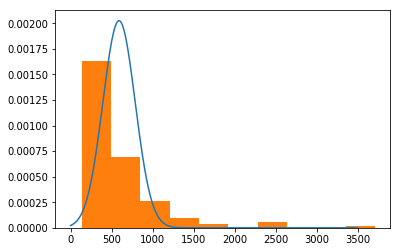

In [47]:
y_norm = []
for x in x_vals:
    y_norm.append(myOwnGausFunct(x, desc["std"], desc["mean"]))
    
    
plt.plot(y_norm)
plt.hist(data.x,normed=True)
plt.show()

In [48]:
print("Sum probabilti34s on gaussian",sum([myOwnGausFunct(x, desc["std"], desc["mean"]) for x in x_vals]))
print("Sum probabilities on exponential", sum([myExpFunc(exp_lambda,x) for x in x_vals]))
    

Sum probabilti34s on gaussian 0.9986636961340252
Sum probabilities on exponential 0.998159382560603


<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h3 style="font-family:Garamond;">Lets calculate the maximim entropy for both probabiltiy distribution functions</h3>
    </section>
</body>

In [49]:
print("Lambda = ",exp_lambda)
print("Maximum entrophy for our Exponential function is")
-1 * sum([myExpFunc(exp_lambda,x)*math.log(myExpFunc(exp_lambda,x)) for x in x_vals])

Lambda =  0.0016915196084312054
Maximum entrophy for our Exponential function is


7.3517907180347235

In [50]:
print("Maximum entrophy for our Gaussian function is")
-1 * sum([myOwnGausFunct(x, desc["std"], desc["mean"])*math.log(myOwnGausFunct(x, desc["std"], desc["mean"])) for x in x_vals])

Maximum entrophy for our Gaussian function is


6.686724407587958

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h3 style="font-family:Garamond;">Via maximum entrophy we can conclude that the exponential probability distribution function, fits better our data than the gaussian probability distribution function</h3>
    </section>
</body>

<body>
    <section style="background-color:White; font-family:Georgia;text-align:center">
        <h3 style="font-family:Garamond;">Lets calculate KL Divergence</h3>
    </section>
</body>

###  $$ D_{KL}(E||G) $$  ### 

In [ ]:
sum([myExpFunc(exp_lambda,x)*math.log(myExpFunc(exp_lambda,x) / myOwnGausFunct(x, desc["std"], desc["mean"])   ) for x in x_vals])

###  $$ D_{KL}(G||E) $$  ### 

In [ ]:
sum([myOwnGausFunct(x, desc["std"], desc["mean"])*math.log(myOwnGausFunct(x, desc["std"], desc["mean"]) / myExpFunc(exp_lambda,x)   ) for x in x_vals])